# Unsupervised Learning Project

## Data Description:
The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it
would be more difficult to distinguish between the cars.

### Domain:
Object recognition
### Context:
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

### Attribute Information:
● All the features are geometric features extracted from the silhouette.

● All are numeric in nature.

### Learning Outcomes:
● Exploratory Data Analysis

● Reduce number dimensions in the dataset with minimal information loss

● Train a model using Principle Components

## Objective:
Apply dimensionality reduction technique – PCA and train a model using principle components instead of training the model using just the raw data.


## Steps and tasks:
1. Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm (10 marks)
2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (10 points)
3. Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn) (5 marks)
4. Train a Support vector machine using the train set and get the accuracy on the test set (10 marks)
5. Perform K-fold cross validation and get the cross validation score of the model (optional)
6. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data – (10 points)
7. Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier. (hint: set the same random state) (20 marks)
8. Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings (5 points)

### References:
● Book on PCA
● Application of PCA for image compression


# 1. Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm (10 marks)


In [307]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [308]:
# Reading the dataset
data = pd.read_csv('vehicle-1.csv')
data.sample(5)

compactness  circularity  distance_circularity  radius_ratio  \
49            91         45.0                  79.0         176.0   
23            87         39.0                  70.0         148.0   
271           93         47.0                  88.0         200.0   
455           81         43.0                  68.0         139.0   
748           93         46.0                  85.0         169.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
49                   59.0                        9          163.0   
23                   61.0                        7          143.0   
271                  66.0                        7          173.0   
455                  62.0                        7          149.0   
748                  66.0                        9          151.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
49            40.0                    20.0                        148   
23            46.0                    18.0                        136   
271           38.0                    21.0                        151   
455           46.0                    19.0                        145   
748           44.0                    19.0                        147   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
49             184.0              404.0                      179.0   
23             164.0              307.0                      141.0   
271            197.0              452.0                      205.0   
455            172.0              323.0                      171.0   
748            169.0              339.0                      179.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
49                          62.0             0.0              10.0   
23                          69.0             1.0               2.0   
271                         66.0             0.0               3.0   
455                         83.0             1.0              14.0   
748                         67.0             0.0               4.0   

     skewness_about.2  hollows_ratio class  
49              199.0            208   car  
23              192.0            199   bus  
271             195.0            202   car  
455             180.0            184   bus  
748             195.0            204   van

In [309]:
# Shape of the data is 846 rows and 19 columns
data.shape

(846, 19)

In [310]:
# There are some missing values in some of the rows. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [311]:
# Let's check the data distribution to decide how to impute the missing values
data.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

* Most of the columns are whole numbers and the mean and median are almost the same, so we can impute the data using the median values. 

In [312]:
# Lets treat the missing values and replace by the median of the column
from sklearn.impute import SimpleImputer

# Remove the target class variable before imputation and store it for future use
y = data['class']
X = data.drop(axis=1, columns=['class'])

cols = X.columns
impute = SimpleImputer(strategy='median')
X = pd.DataFrame(impute.fit_transform(X), columns=cols)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    float64
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    float64
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    float64
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

* Now the data is clean without any missing values

# 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (10 points)


### 2.1 Finding out the Correlation between the independent variables

In [313]:
corr = X.corr()
corr

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.689743     0.620912              0.767035   
pr.axis_aspect_ratio            0.091534     0.153778              0.158456   
max.length_aspect_ratio         0.148249     0.251467              0.264686   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.762070     0.796306              0.861519   
scaled_variance.1               0.814012     0.835946              0.886017   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.249593     0.051946             -0.225944   
skewness_about                  0.236078     0.144198              0.113924   
skewness_about.1                0.157015    -0.011439              0.265547   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689743              0.091534   
circularity                      0.620912              0.153778   
distance_circularity             0.767035              0.158456   
radius_ratio                     1.000000              0.663447   
pr.axis_aspect_ratio             0.663447              1.000000   
max.length_aspect_ratio          0.450052              0.648724   
scatter_ratio                    0.734429              0.103732   
elongatedness                   -0.789481             -0.183035   
pr.axis_rectangularity           0.708385              0.079604   
max.length_rectangularity        0.568949              0.126909   
scaled_variance                  0.793415              0.272910   
scaled_variance.1                0.718436              0.089189   
scaled_radius_of_gyration        0.536372              0.121971   
scaled_radius_of_gyration.1     -0.180397              0.152950   
skewness_about                   0.048713             -0.058371   
skewness_about.1                 0.173741             -0.031976   
skewness_about.2                 0.382214              0.239886   
hollows_ratio                    0.471309              0.267725   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812620   
circularity                                 0.251467       0.847938   
distance_circularity                        0.264686       0.905076   
radius_ratio                                0.450052       0.734429   
pr.axis_aspect_ratio                        0.648724       0.103732   
max.length_aspect_ratio                     1.000000       0.166191   
scatter_ratio                               0.166191       1.000000   
elongatedness                              -0.180140      -0.971601   
pr.axis_rectangularity                      0.161502       0.989751   
max.length_rectangularity                   0.305943       0.809083   
scaled_variance                             0.318957       0.948662   
scaled_variance.1                           0.143253       0.993012   
scaled_radius_of_gyration                   0.189743       0.799875   
scaled_radius_of_gyration.1                 0.295735      -0.027542   
skewness_about                              0.015599       0.074458   
skewness_about.1                            0.043422       0.212428   
skewness_about.2                           -0.

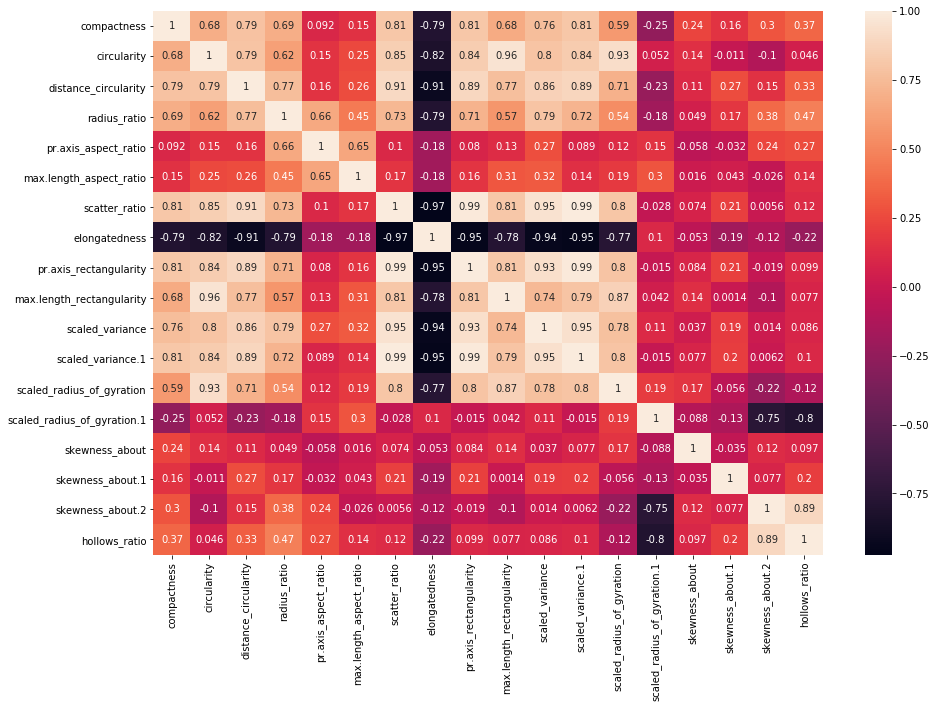

In [314]:
# Let's check the heatmap to better visualize the correlation coefficients
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

### 2.2 Observations:

* From the heatmap, its very clear the columns circularity, scatter_ratio, elongatedness and pr.axis_rectangularity will be causing multicollinearity problem. Because these columns have multiple correlation coeeficient values greater than 0.9
* Remaining columns don't have as high correlation, so they need to be retained
* Pairplot indicates there are 3 clusters possible from the KDE plots which is the 3 types of vehicles
* The Pairplot also indicates there are lots of variables which are interdependent on each other which may impact the accuracy of the model

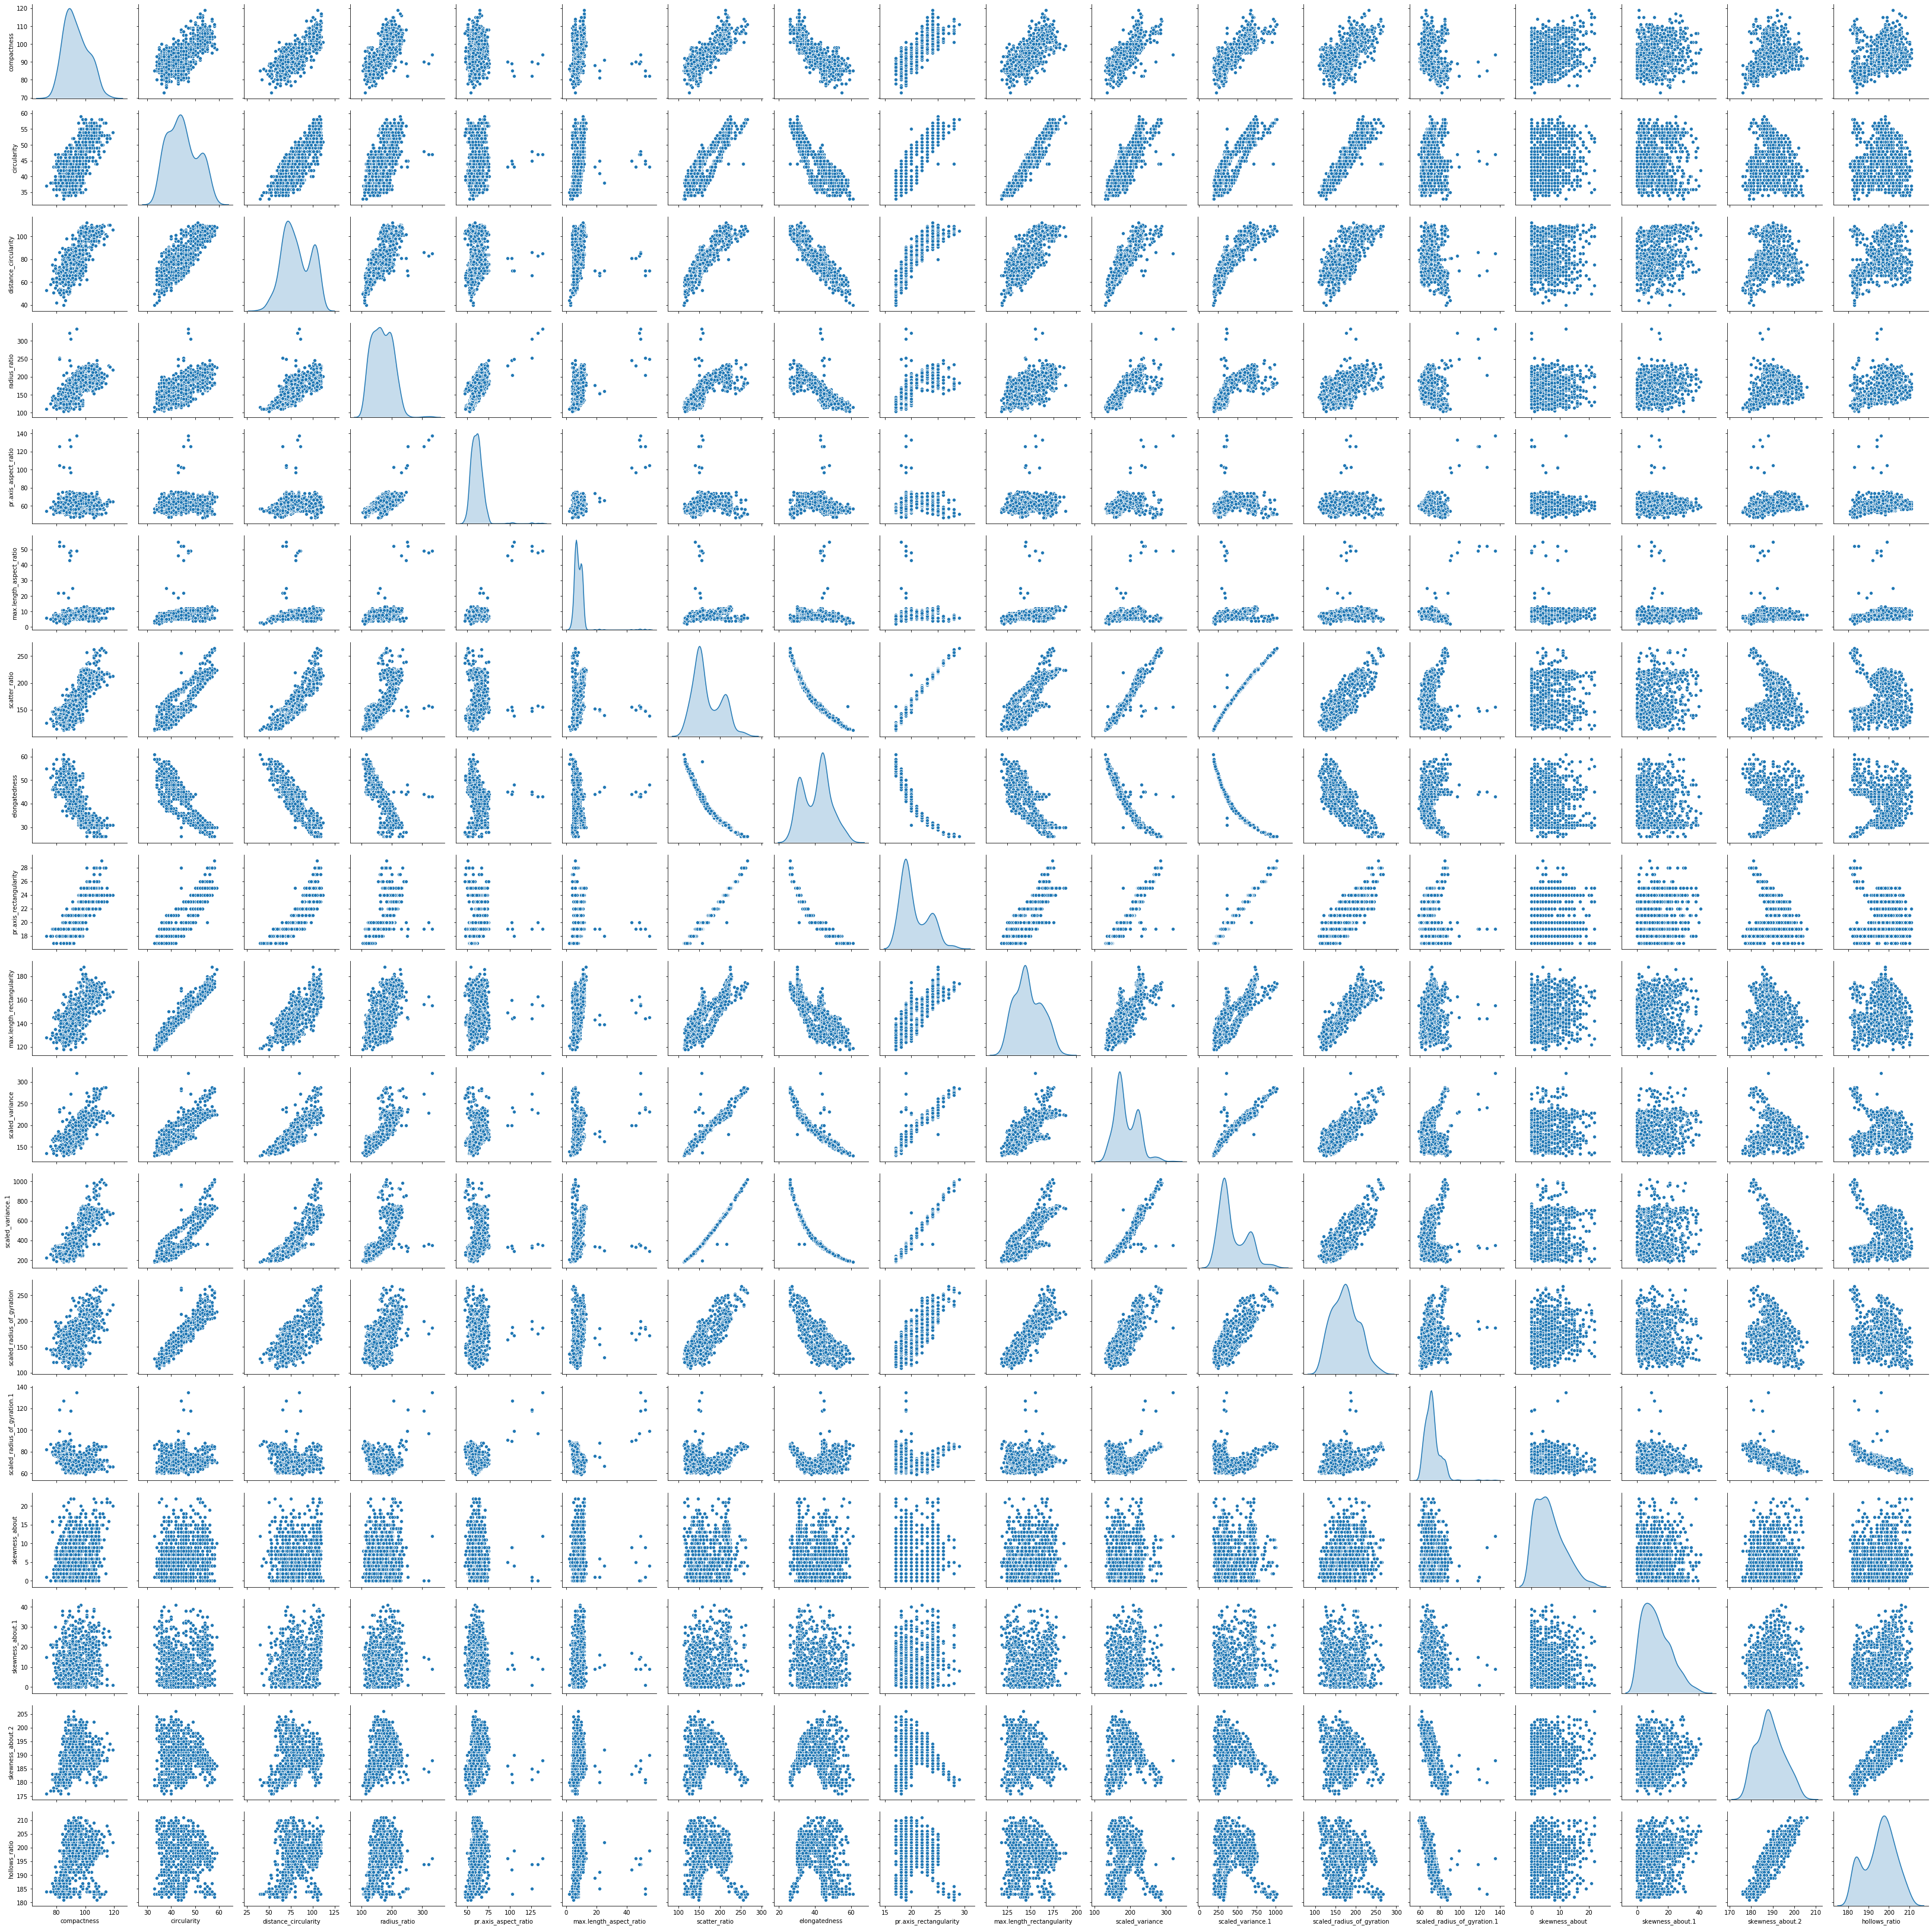

In [315]:
sns.pairplot(X, diag_kind='kde')

### 2.3 To Drop columns or not?
To avoid multicolleniarity issue, one should drop the columns. 
However, in the later part of the project, we want to do Principal component analysis. So, its better to retain all original variables and capture the maximum variance possible in the PCA itself. 

In [316]:
# Decided not to drop the columns. 
# X.drop(columns=['circularity', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity'], inplace=True)
# X.shape

# 3. Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn) (5 marks)

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)
X_train.head()

compactness  circularity  distance_circularity  radius_ratio  \
508         95.0         46.0                  92.0         159.0   
357        109.0         49.0                 109.0         193.0   
360        108.0         52.0                 109.0         182.0   
583        104.0         54.0                 101.0         197.0   
581         89.0         36.0                  68.0         141.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
508                  63.0                     11.0          160.0   
357                  59.0                     10.0          207.0   
360                  55.0                     12.0          216.0   
583                  64.0                     11.0          213.0   
581                  59.0                      8.0          139.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
508           42.0                    20.0                      157.0   
357           32.0                    24.0                      156.0   
360           31.0                    24.0                      171.0   
583           31.0                    24.0                      172.0   
581           47.0                    18.0                      130.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
508            176.0              372.0                      171.0   
357            225.0              635.0                      213.0   
360            229.0              687.0                      214.0   
583            218.0              669.0                      222.0   
581            166.0              291.0                      127.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
508                         70.0             7.0              21.0   
357                         70.0            13.0              31.0   
360                         72.0            10.0              28.0   
583                         74.0            14.0               4.0   
581                         73.0             7.0               1.0   

     skewness_about.2  hollows_ratio  
508             189.0          200.0  
357             191.0          202.0  
360             189.0          201.0  
583             187.0          196.0  
581             189.0          196.0

# 4. Train a Support vector machine using the train set and get the accuracy on the test set (10 marks)


### A) SVM with default parameters

In [318]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
print('Train set Accuracy: ', svc.score(X_train, y_train))
y_pred = svc.predict(X_test)
print('Test set Accuracy: ', svc.score(X_test, y_test))

Train set Accuracy:  0.6554054054054054
Test set Accuracy:  0.6929133858267716


In [319]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 31,  19,   7],
       [  6, 110,  24],
       [ 21,   1,  35]], dtype=int64)

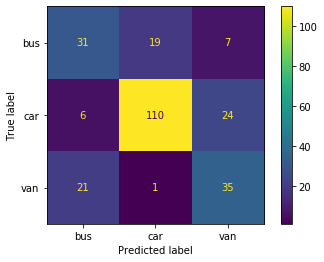

In [320]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc, X_test, y_test, values_format='g')

# 5. Perform K-fold cross validation and get the cross validation score of the model (optional)

### B) SVM with K-fold cross validation

In [321]:
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict, GridSearchCV

param = {
    'C' : [1.0, 2.0, 10.0],
    'gamma' : ['scale', 'auto']
}

grid = GridSearchCV(svc, param, cv=5, refit=True)
grid.fit(X_train, y_train)

print('Train set Accuracy: ', grid.score(X_train, y_train))
print('Test set Accuracy: ', grid.score(X_test, y_test))

Train set Accuracy:  0.8682432432432432
Test set Accuracy:  0.8700787401574803


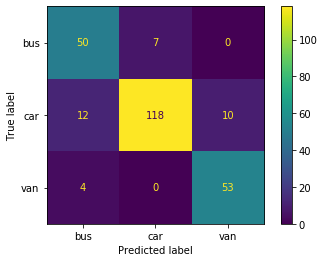

In [322]:
plot_confusion_matrix(grid, X_test, y_test, values_format='0.0f')

# 6. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data – (10 points)

### 6.1 Data Scaling
Need to scale the data before applying Principal Component Analysis

In [323]:
from scipy.stats import zscore

X_scaled = X.apply(zscore)
X_scaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

In [324]:
X_scaled.shape

(846, 18)

### 6.2 Principal Component Analysis

In [325]:
from sklearn.decomposition import PCA

pca = PCA(n_components=14, random_state=10)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=14, random_state=10,
    svd_solver='auto', tol=0.0, whiten=False)

In [326]:
# Checking the explained variance by each Principal component, 
# it looks like the first 4 components explain the majority of the variance in the data

pca.explained_variance_

array([9.40460261, 3.01492206, 1.90352502, 1.17993747, 0.91726063,
       0.53999263, 0.35887012, 0.22193246, 0.1606086 , 0.09185722,
       0.06649941, 0.0466006 , 0.03579472, 0.02741207])

In [327]:
# Checking the Explained variance ratio 
pca.explained_variance_ratio_

array([0.52186034, 0.16729768, 0.10562639, 0.0654746 , 0.05089869,
       0.02996413, 0.01991366, 0.01231501, 0.00891215, 0.00509715,
       0.00369004, 0.00258586, 0.00198624, 0.00152109])

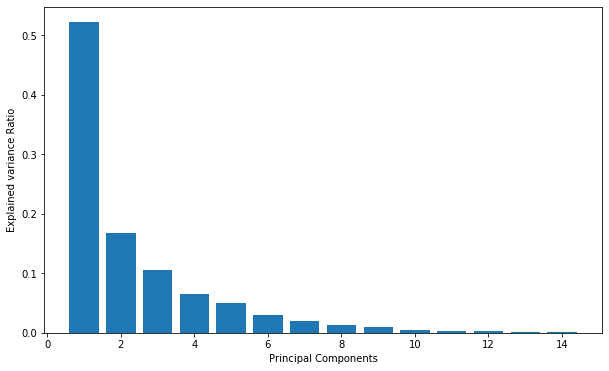

In [328]:
# Plotting a bar graph to visualize the comparitive explained variance
plt.figure(figsize=(10,6))
plt.xlabel('Principal Components')
plt.ylabel('Explained variance Ratio')
plt.bar(list(range(1,15)),pca.explained_variance_ratio_);

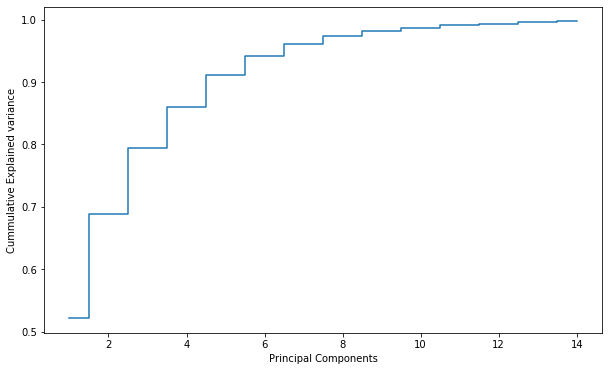

In [329]:
# Plotting a step graph to view the cummulative explained variance 
plt.figure(figsize=(10,6))
plt.xlabel('Principal Components')
plt.ylabel('Cummulative Explained variance')
plt.step(list(range(1,15)),np.cumsum(pca.explained_variance_ratio_),where='mid');

In [330]:
np.cumsum(pca.explained_variance_ratio_)

array([0.52186034, 0.68915802, 0.79478441, 0.86025901, 0.9111577 ,
       0.94112183, 0.96103549, 0.97335049, 0.98226265, 0.98735979,
       0.99104984, 0.9936357 , 0.99562195, 0.99714304])

### 6.3 Dimensionality Reduction

From the above Step graph and the above cummulative explained variance numbers, it appears that 7 Principal components are required to explain more than 95% of the total variance in the dataset

In [331]:
pca7 = PCA(n_components=7)
pca7.fit(X_scaled)
Xpca7 = pd.DataFrame(pca7.transform(X_scaled))
Xpca7.head()

0         1          2         3         4         5         6
0  0.334162 -0.219026   1.001584  0.176612  0.079301 -0.757447 -0.901124
1 -1.591711 -0.420603  -0.369034  0.233234  0.693949 -0.517162  0.378637
2  3.769324  0.195283   0.087859  1.202212  0.731732  0.705041 -0.034584
3 -1.738598 -2.829692   0.109456  0.376685 -0.362897 -0.484431  0.470753
4  0.558103  4.758422  11.703647  0.147464  3.256953 -0.203446  2.671578

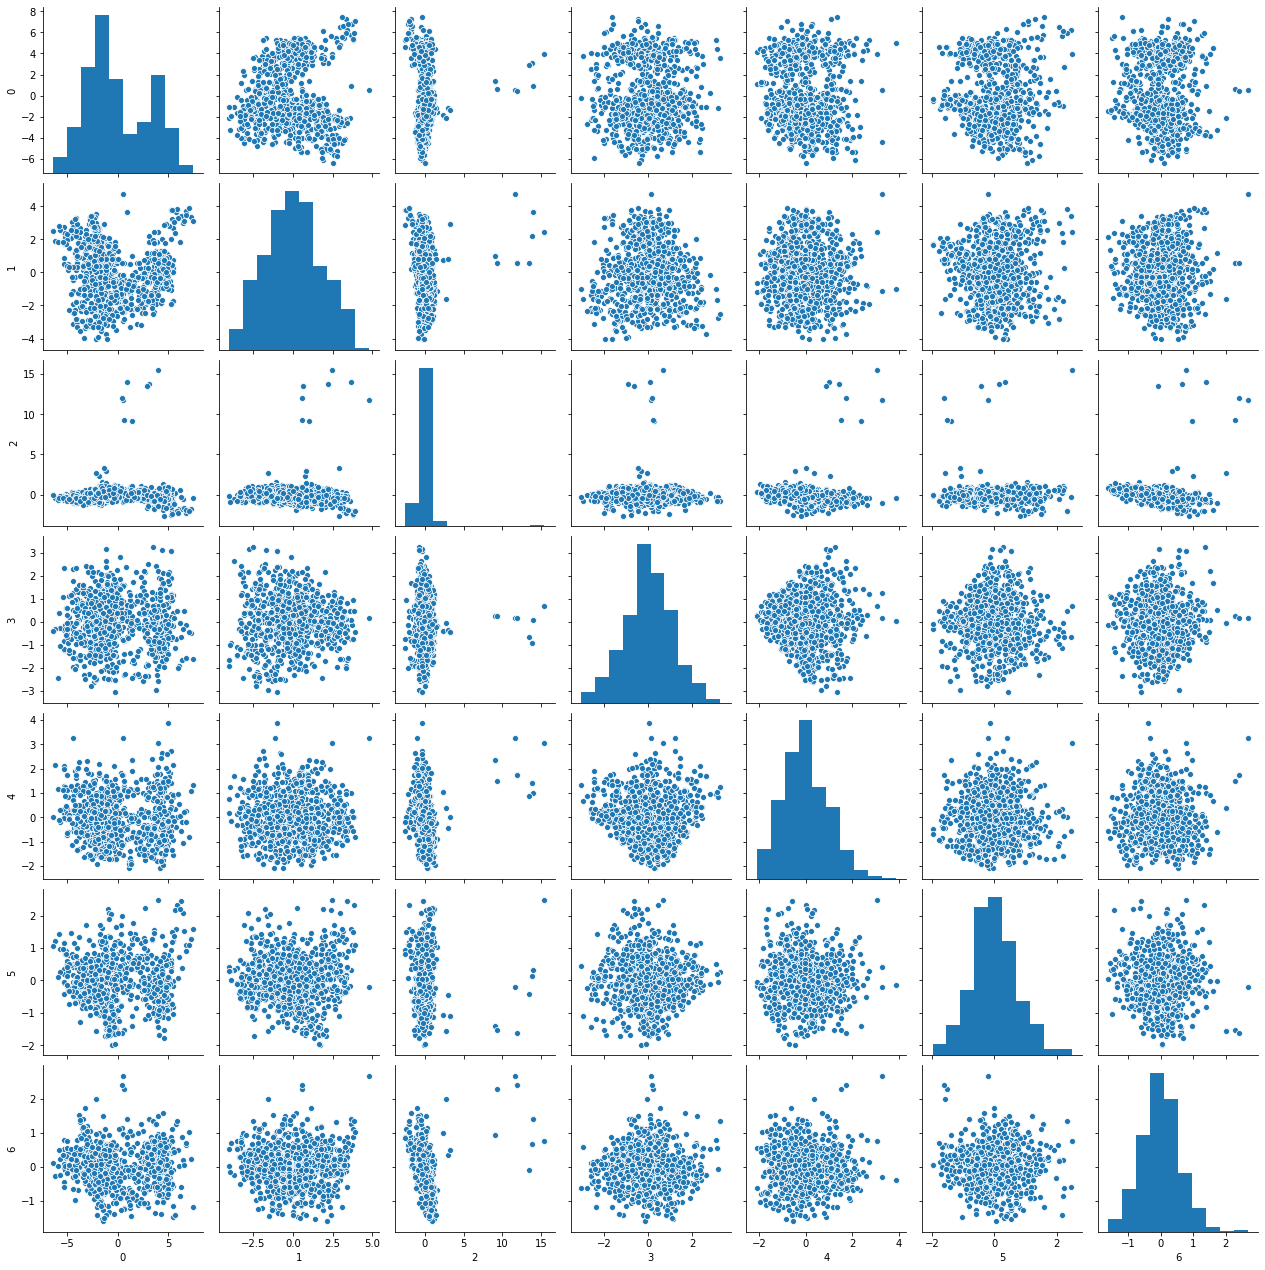

In [332]:
sns.pairplot(Xpca7);

### Result: As a result of PCA, the 14 attributes have been extracted into 7 dimensions which are independent of each other

# 7. Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier. (hint: set the same random state) (20 marks)


In [333]:
# Generating the new Train Test set using the same random state. 
X_train, X_test, y_train, y_test = train_test_split(Xpca7, y, test_size=0.3, random_state=6)
X_train.head()

0         1         2         3         4         5         6
508  0.091172 -0.631300  0.194417 -0.224258  0.723698 -1.248764 -0.119753
357  4.008615 -0.941660 -0.964436 -0.564440  2.072596 -0.097346  0.164240
360  4.520600 -0.118799 -1.033967 -0.554149  1.494616 -1.016556  0.569268
583  4.247794  0.780550 -0.080355  1.839694  0.359000  0.041237  0.146204
581 -3.261703 -0.322424  0.099568  0.592769 -0.349468  0.681609  1.005741

### C) SVM with Principal components

In [334]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
print('Train set Accuracy: ', svc.score(X_train, y_train))
y_pred = svc.predict(X_test)
print('Test set Accuracy: ', svc.score(X_test, y_test))

Train set Accuracy:  0.9391891891891891
Test set Accuracy:  0.9173228346456693


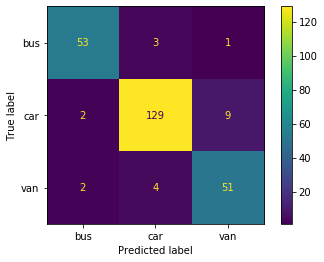

In [335]:
plot_confusion_matrix(svc, X_test, y_test, values_format='0.0f')

### D) SVM with Principal components using K-fold cross validation

In [336]:
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict, GridSearchCV

param = {
    'C' : [1.0, 2.0, 10.0],
    'gamma' : ['scale', 'auto']
}

grid = GridSearchCV(svc, param, cv=5, refit=True)
grid.fit(X_train, y_train)

print('Train set Accuracy: ', grid.score(X_train, y_train))
print('Test set Accuracy: ', grid.score(X_test, y_test))

Train set Accuracy:  0.9662162162162162
Test set Accuracy:  0.9212598425196851


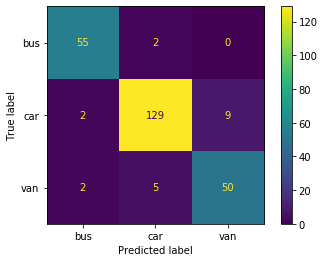

In [337]:
plot_confusion_matrix(grid, X_test, y_test, values_format='0.0f')

# 8. Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings (5 points)

### Conclusion:

- Comparing the test dataset accuracy scores:
    1. Default SVM: 69.29 %
    2. SVM with 5-fold cross validation: 87.01 %
    3. SVM after PCA: 91.73 %
    4. SVM after PCA with 5-fold cross validation: 92.12 %
   

- Findings:
    1. PCA improves the model accuracy by a considerable amount ~ almost 20% in this case
    2. PCA reduces the dimensionality of the dataset from 14 to 7 attributes, thus saving a lot of computational power
    3. The amount of variance captured by PCA is 95% less than using the complete dataset, but the model accuracy is still higher than that of the best SVM parameters determined by K-fold cross validation technique